#**Importing libraries**

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [3]:
import tensorflow as tf
import os
from google.colab import drive
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

#**Split data**

Initial dataset consist of 2 classes *('FAKE', 'REAL')*, each class consist of **60 000** images.

The data was splited into three folders using below mentioned script.

**85%** - **TRAIN** data, **10%** - **VALIDATION** data, **5%** - **TEST** data

In [ ]:
# pip install split-folders

In [ ]:
# import splitfolders

# splitfolders.ratio("data", # The location of dataset
#                    output="ai_real_dataset", # The output location
#                    seed=42, # The number of seed
#                    ratio=(.85, .10, .05), # The ratio of splited dataset
#                    group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
#                    move=False # If you choose to move, turn this into True
#                    )

#**Load dataset**

## Load dataset from drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!unzip -uq "/content/drive/My Drive/ai_real_dataset.zip" -d "/content"

## Initiate Keras datasets from the uploaded files

In [8]:
train_dir = os.path.join('ai_real_dataset', 'train')
validation_dir = os.path.join('ai_real_dataset', 'val')
test_dir = os.path.join('ai_real_dataset', 'test')

In [9]:
BATCH_SIZE = 128
IMG_SIZE = (32, 32)

In [10]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 102000 files belonging to 2 classes.


In [11]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 12000 files belonging to 2 classes.


In [12]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 6000 files belonging to 2 classes.


## Plot images

['FAKE', 'REAL']


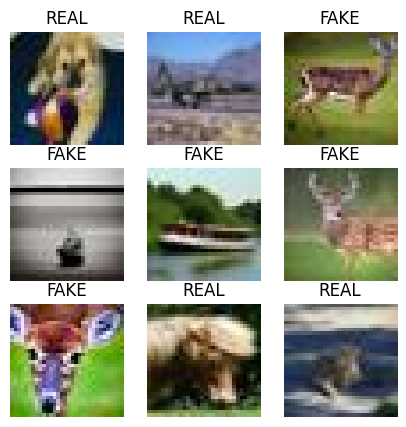

In [13]:
class_names = train_dataset.class_names

print(class_names)

plt.figure(figsize=(5, 5))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
print('Number of train batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of train batches: 797
Number of validation batches: 94
Number of test batches: 47


#### Optimize data loading performance

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# **Data aumentation**

## Augmentation layers

* **tf.keras.layers.RandomContrast(0.7):** randomly adjusts the contrast of images by a factor of 0.7, introducing variation in image appearance.

* **tf.keras.layers.RandomFlip('horizontal')**: randomly flips images horizontally, creating mirrored versions of the original images.

* **tf.keras.layers.RandomRotation(0.2)**: randomly rotates images by up to 0.2 radians, adding rotation-based diversity to the dataset.

* **tf.keras.layers.RandomZoom(0.3, 0.2)**: randomly zooms in or out on images, with zoom factors ranging from 0.3 to 0.2.

In [16]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomContrast(0.7),
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.3, 0.2),
])

## Augmentation visualization

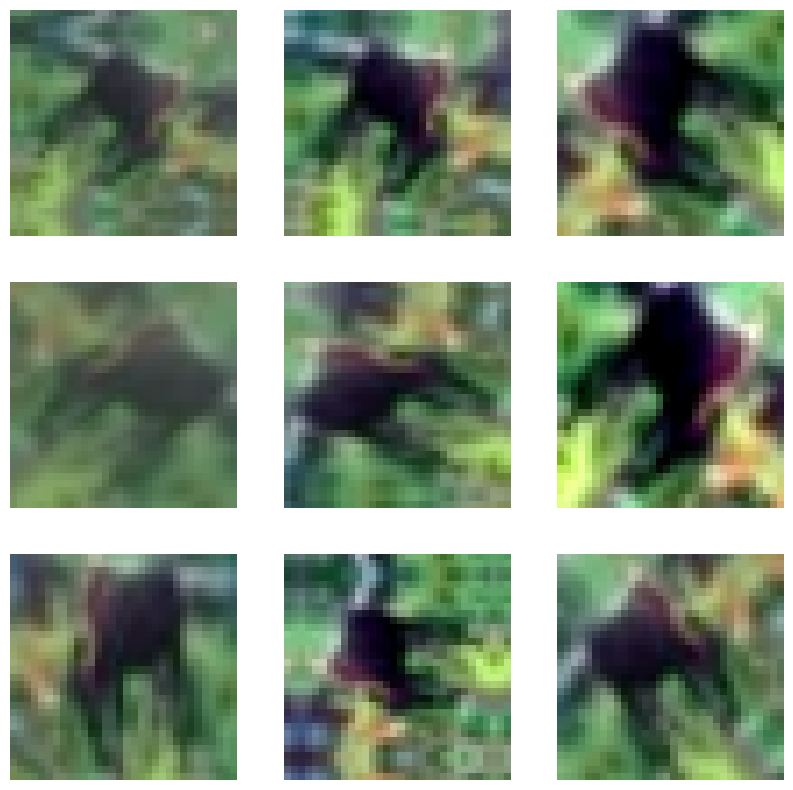

In [17]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')